# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  40 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Импорты из sklearn:

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#<...>

## Задача 1

Реализуйте функции:

- скользящего среднего
- экспоненциального сглаживания
- двойного эскпоненциального сглаживания (метод Хольта)

Визуализируйте результаты работы функций.




### 0. Загрузка данных

#### **Профиль физика**


В этой задаче мы будем работать с данными по электропотреблению. Данные можете скачать с [сайта](https://miptstats.github.io/courses/ad_mipt.html).

In [19]:
file_path = "data_phys_12.csv"
data = pd.read_csv(file_path, index_col=[0], parse_dates=[0])
data.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Мы будем работать с колонкой `nat_demand`. Проверьте, есть ли в этом столбце пропуски. Если да - удалите эти строки.

In [20]:
data.isna().sum()

nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

Пропусков нет, поэтому продолжим работать с исходной таблицей

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

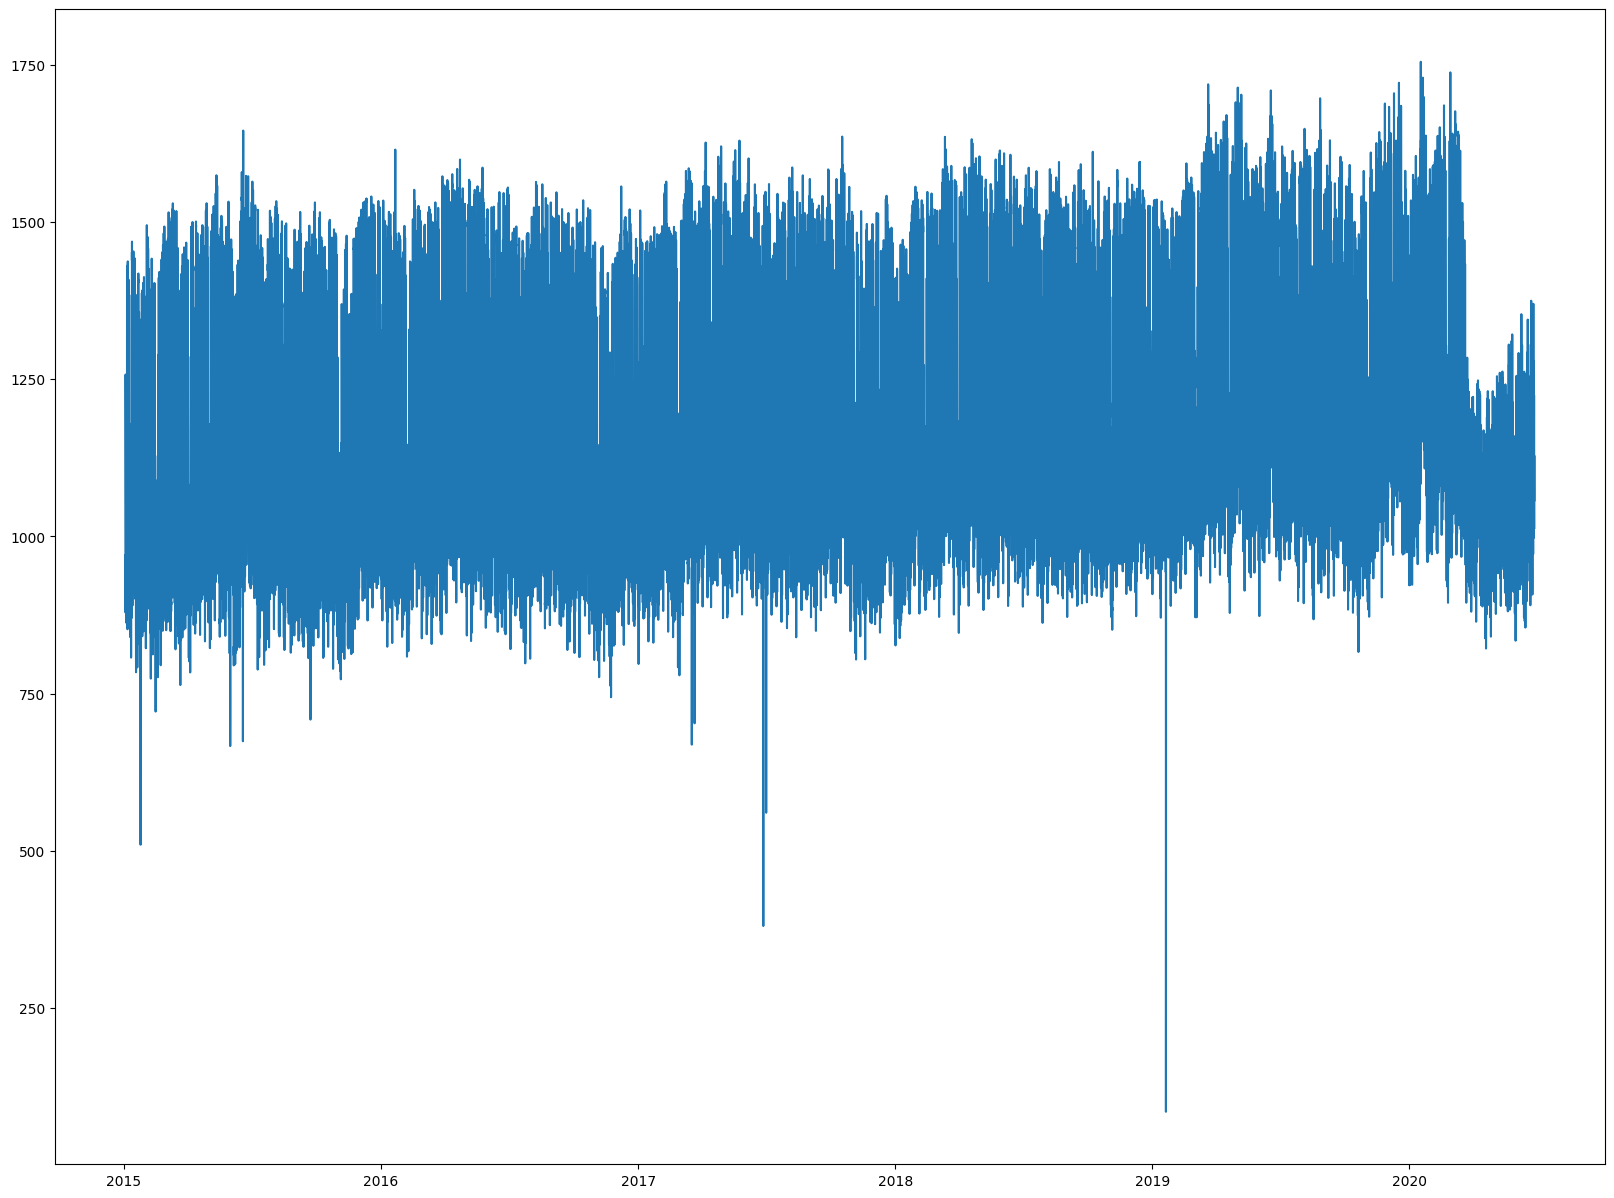

In [75]:
plt.figure(figsize=(20, 15))
plt.plot(data['nat_demand'])

#### **Профиль биология**

В этом домашнем задании мы будем работать с данными о сердцебиении человека во время сна. Скачать и изучить подробнее [здесь](https://www.kaggle.com/datasets/jacekmakola/goodnight1). 

In [ ]:
data = pd.read_csv('hrb_sample_1.csv')
data

Формат данных достаточно специфичен. Очистим нашу таблицу от ненужной информации.

In [ ]:
data = pd.DataFrame(data.values, columns=data.loc[1])
data = data.drop(0)
data = data.drop(1)
data.tail()

Уберем лишние колонки.

In [ ]:
data = data[['Time', 'HR (bpm)']]

Колонку `Time` преобразуем к правильному типу данных и поставим вместо индексов.

In [ ]:
data["Time"] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

Посмотрим, в каком формате хранятся данные о сердцебиении.

In [ ]:
type(data['HR (bpm)'][0])

Переведите значения `HR (bpm)` к целым числам.

In [ ]:
<...>

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

In [ ]:
<...>


### 1. Скользящее среднее

In [27]:
def moving_average(series:pd.Series, n:int)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    n:int - величина скользящего окна

    output:pd.Series - сглаженные данные
    '''

    return series.rolling(n).mean()

Нарисуйте на одном графике исходные данные и обработанные скользящим средним. Рассмотрите минимум **два** разных `n` и обоснуйте свой выбор этих значений.

*Замечание: при корректной реализации функции первые элементы превратятся в NaN, поэтому рисовать график нужно для `series[n:]`*

Выберем n=50;200, чтобы отслеживать среднюю за короткий период и за долгий период, таким образом можно будет понять, тренд на повышение/снижение потребления краткосрочный (месяц к месяцу) или глобальный (год к году) 

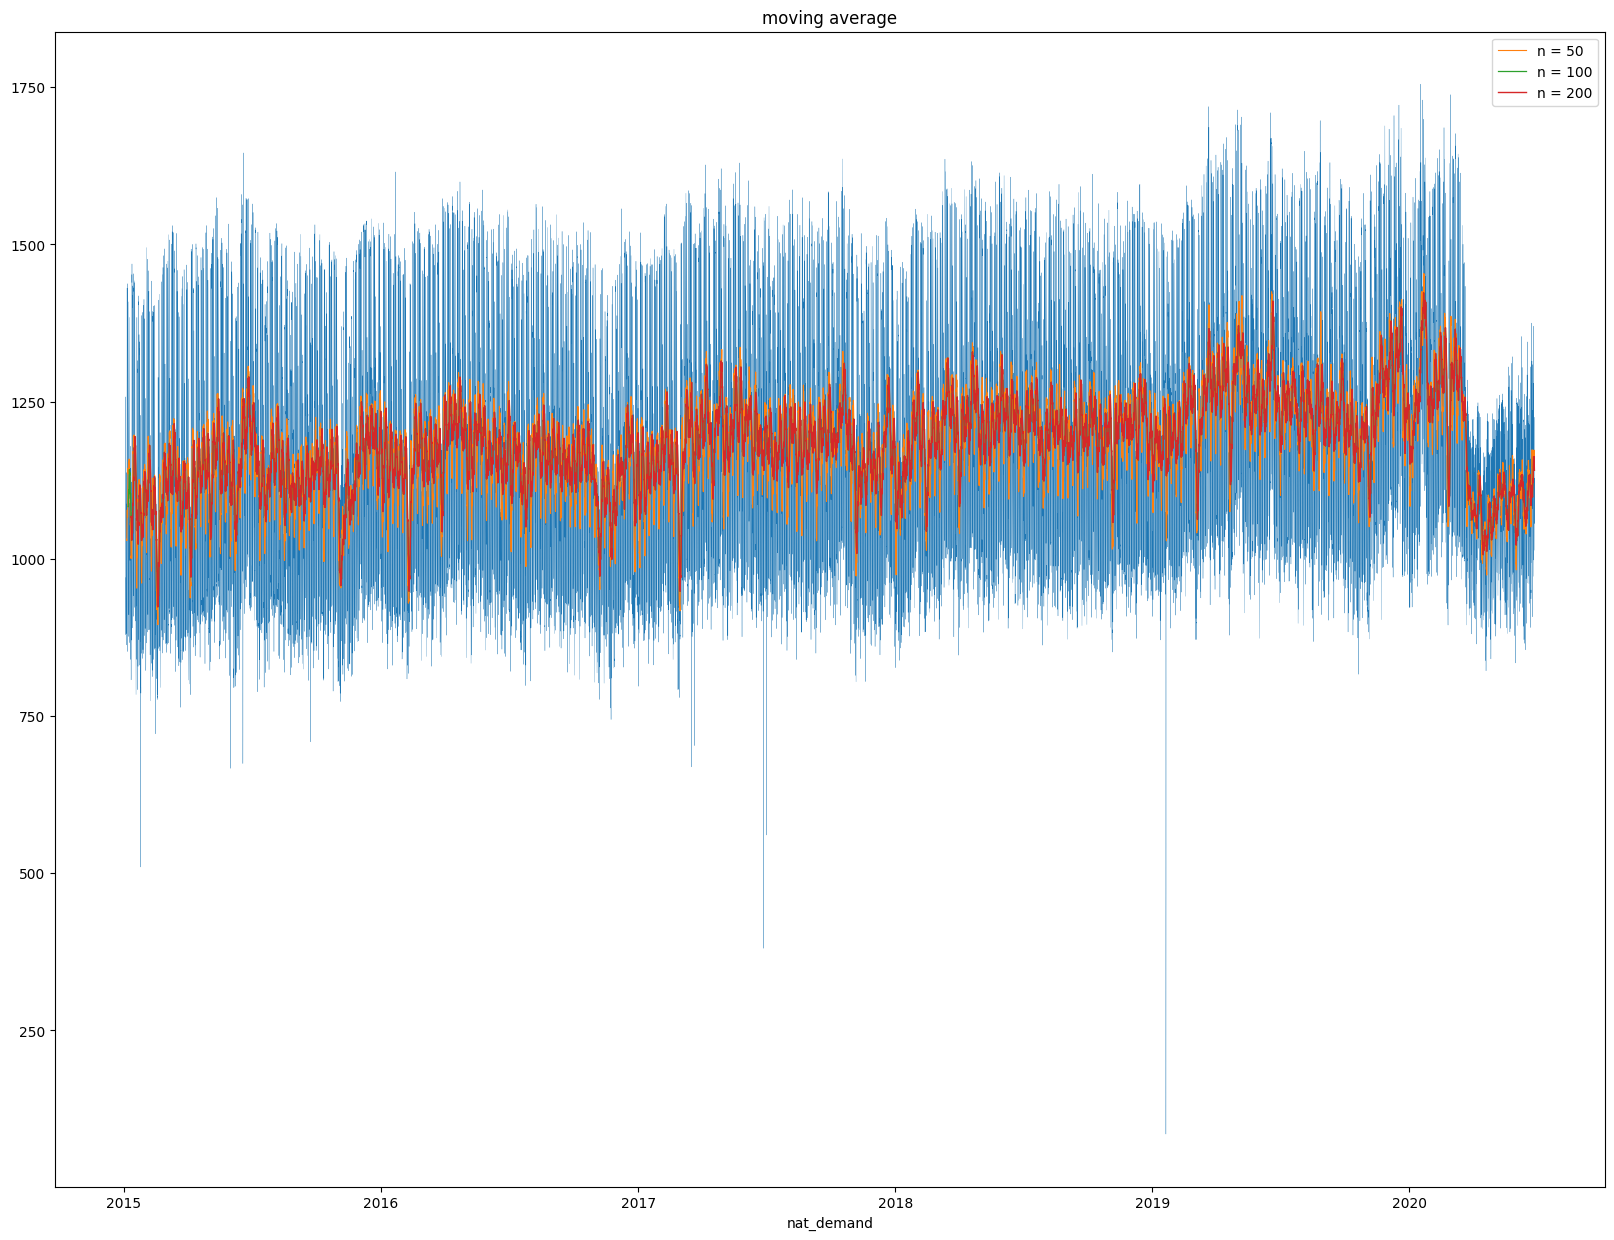

In [74]:
data_1 = moving_average(data['nat_demand'], 50)
data_2 = moving_average(data['nat_demand'], 100)
data_3 = moving_average(data['nat_demand'], 200)

plt.figure(figsize=(20,15))
plt.plot(data['nat_demand'], lw = 0.2)
plt.plot(data_1[50:], lw=0.8, label="n = 50")
plt.plot(data_2[100:], lw=0.9, label="n = 100")
plt.plot(data_2[200:], lw=1, label="n = 200")

plt.xlabel("nat_demand")
plt.title("moving average")

plt.legend()

### 2. Экспоненциальное сглаживание

In [41]:
pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Матвей\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing


In [49]:
def exponential_smoothing(series:pd.Series, alpha:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    '''

    return SimpleExpSmoothing(series).fit(smoothing_level=alpha,optimized=False)

Нарисуйте на одном графике исходные данные и обработанные функцией экпоненциального сглаживания. Рассмотрите минимум **два** разных `alpha`. Следите за аккуратностью графика.


C:\Users\Матвей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Матвей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Матвей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


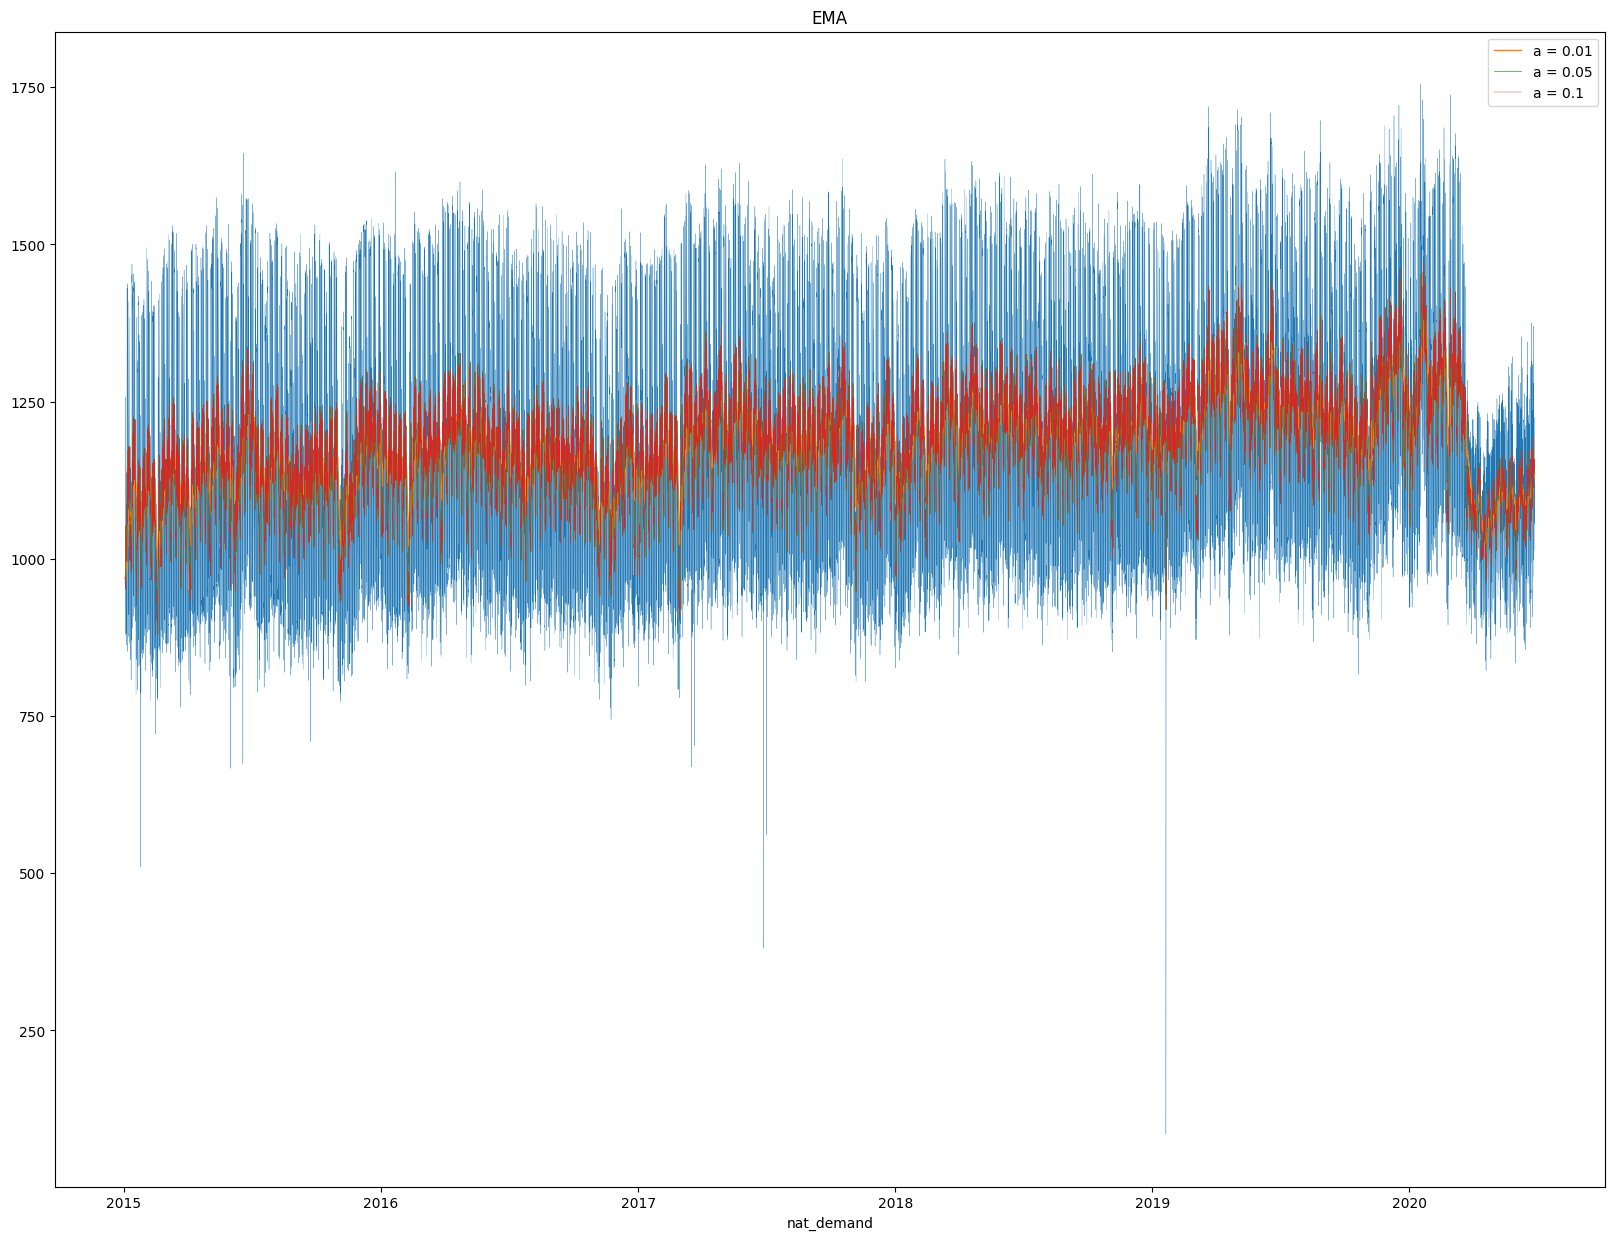

In [73]:
exp_1 = exponential_smoothing(data['nat_demand'], 0.01)
exp_2 = exponential_smoothing(data['nat_demand'], 0.05)
exp_3 = exponential_smoothing(data['nat_demand'], 0.1)

plt.figure(figsize=(20,15))
plt.plot(data['nat_demand'], lw = 0.2)
plt.plot(exp_1.fittedvalues, lw=1, label="a = 0.01")
plt.plot(exp_2.fittedvalues, lw=0.5, label="a = 0.05")
plt.plot(exp_2.fittedvalues, lw=0.3, label="a = 0.1")

plt.xlabel("nat_demand")
plt.title("EMA")

plt.legend()

### 3. Двойное экспоненциальное сглаживание (метод Хольта)

In [66]:
from statsmodels.tsa.api import Holt


In [67]:
def double_exponential_smoothing(series, alpha:float, beta:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    beta:float - сглаживающий фактор
    '''

    return Holt(series, initialization_method="estimated").fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)

Нарисуйте на одном графике исходные данные и обработанные функцией двойного экпоненциального сглаживания. Рассмотрите минимум **три** разных пары `alpha` и `beta`. Следите за аккуратностью графика.

C:\Users\Матвей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Матвей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Матвей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


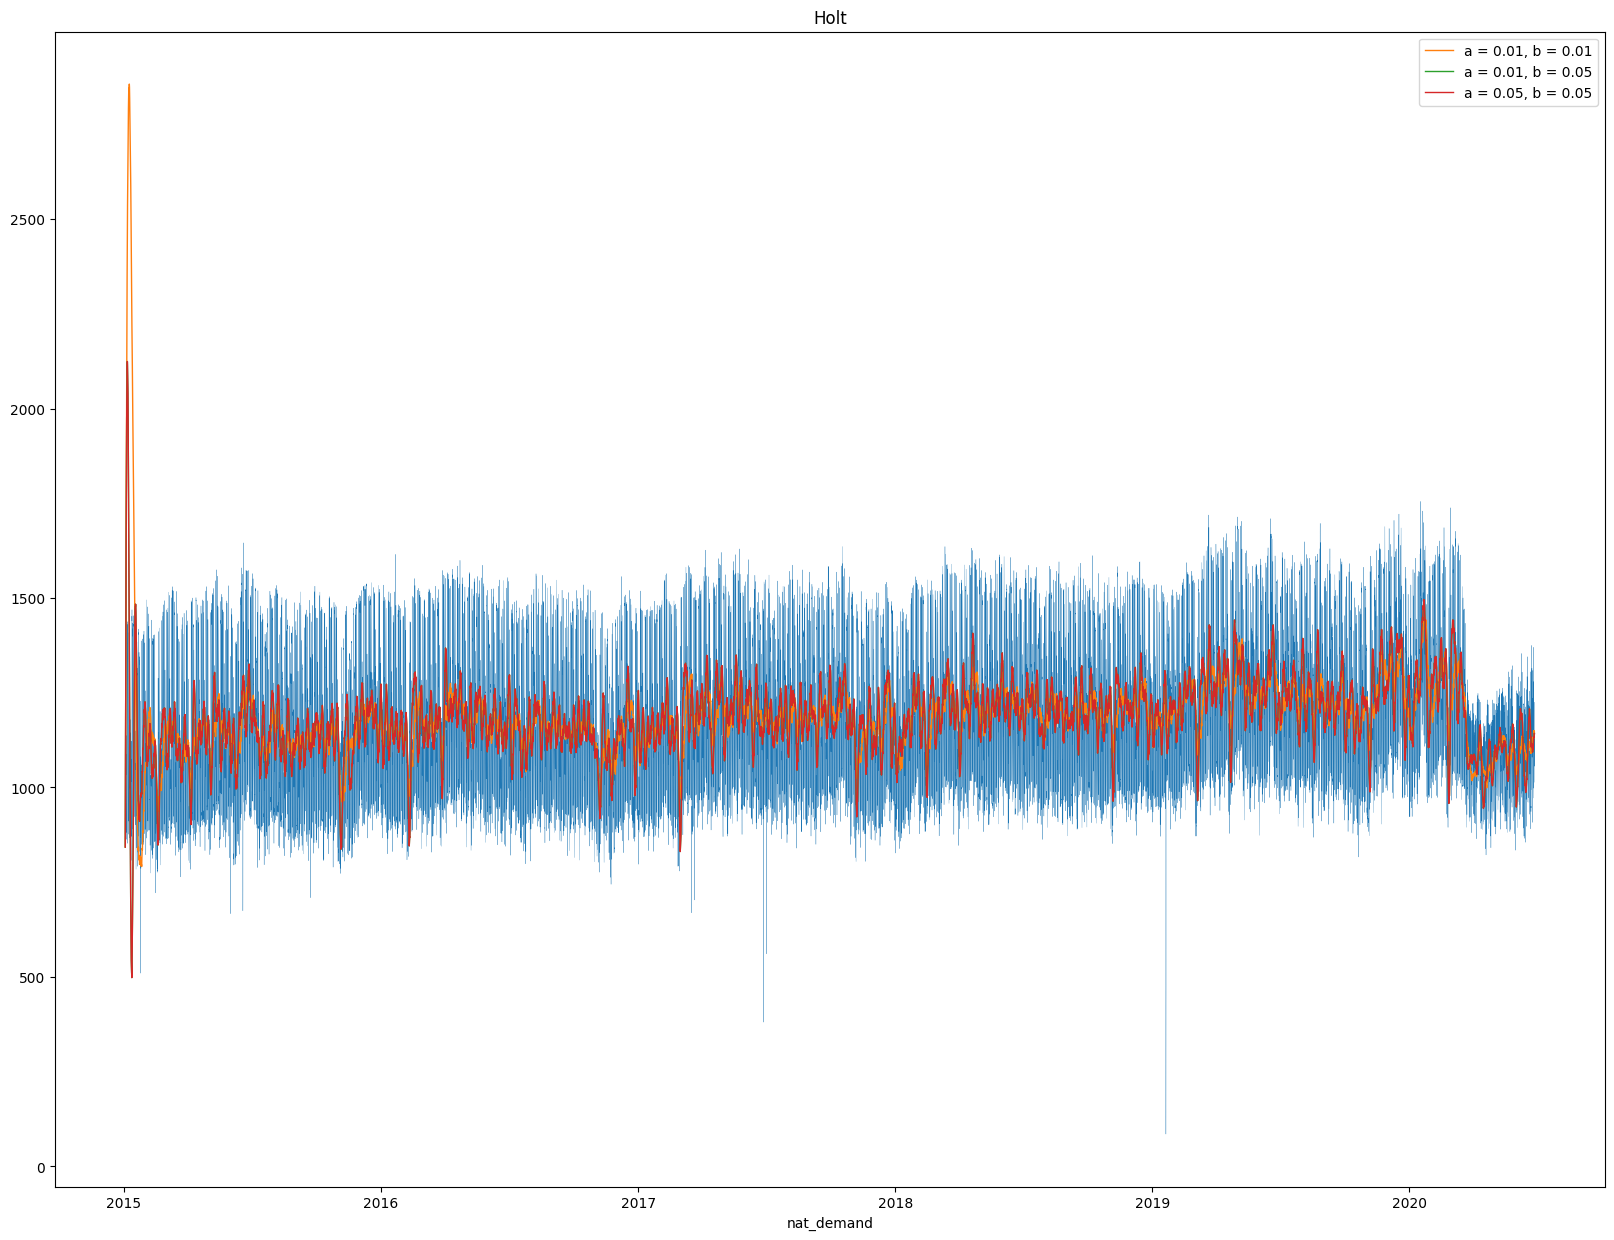

In [72]:
holt_1 = double_exponential_smoothing(data['nat_demand'], 0.01, 0.01)
holt_2 = double_exponential_smoothing(data['nat_demand'], 0.01, 0.05)
holt_3 = double_exponential_smoothing(data['nat_demand'], 0.05, 0.05)

plt.figure(figsize=(20,15))
plt.plot(data['nat_demand'], lw = 0.2)
plt.plot(holt_1.fittedvalues, lw=1, label="a = 0.01, b = 0.01")
plt.plot(holt_2.fittedvalues, lw=1, label="a = 0.01, b = 0.05")
plt.plot(holt_2.fittedvalues, lw=1, label="a = 0.05, b = 0.05")

plt.xlabel("nat_demand")
plt.title("Holt")

plt.legend()

## Задача 2.

Продолжайте работать с выбранными данными. Разбейте их таким образом, чтобы в тесте остались последние 20% измерений.



In [ ]:
<...>

### 1. Baseline

В любой задаче машинного обучения сначала полезно строить простые модели, так называемые `baseline`. Сгенерируйте фичи из даты. Поясните свой выбор.

In [ ]:
<...>

**Ответ:**

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных. 

In [ ]:
<...>

Визуализируйте полученные прогнозы.

In [ ]:
<...>

Посчитайте метрики.

In [ ]:
<...>

### 2. Рекурсивная стратегия

Обучите линейную регрессию с регуляризацией и случайный лес используя рекурсивную стратегию. 



In [ ]:
<...>

Визуализируйте полученные прогнозы.

In [ ]:
<...>

Посчитайте метрики.

In [ ]:
<...>

### 3. Временные сдвиги 

Поработаем еще с признаками. На этот раз добавим сдвиги по времени. Таким образом модель сможет использовать информацию из прошлого, для составления прогноза на будущее. Добавьте новые признаки к вашим данным.

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [ ]:
<...>

Визуализируйте полученные прогнозы.

In [ ]:
<...>

Посчитайте метрики.

In [ ]:
<...>

Сделайте выводы по задаче.

**Вывод:**

## Задача 3.

Используя функции, реализованные в задаче 1, добавьте сглаживание в ваш датасет. Поясните выбор функции сглаживания.

In [ ]:
<...>

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [ ]:
<...>

Визуализируйте полученные прогнозы.

In [ ]:
<...>

Посчитайте метрики.

In [ ]:
<...>

**Вывод:**

## Задача 4.

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес. 

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

In [ ]:
<...>

y_pred = <...>

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [ ]:
<...>

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [ ]:
errors_pred = <...>

Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [ ]:
<...>

Визуализируйте новый прогноз.

In [ ]:
<...>

Сделайте вывод.

**Вывод:**<...>

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.